## Problem Statement and Initial Ideas

**Problem Statement:**

The wallstreetbets reddit community gets a lot of flack for its incredibly bold -- at times, downright absurd -- trades. However, it was very right about the GME saga, thanks for the EXPR adn AMC sympathy gains. How can I measure the success of the community in taking certain trade positions? 

**Initial Idea:** 

I would need to consider what stocks to look for and where to look for them within wallstreetbets. Would it be a good idea to look for all traded stocks on the NYSE? Certain industries? The NASDAQ (ultimately came back to this one)? 

I began by trying to consider the stocks in the S&P 500. Webscraping these stocks from wikipedia was simple enough and shown below. The initial idea was to look at the section of posts called 'due dilligence.' Here, redditors post their trade ideas and justifications, sometimes justification is a stretch. 

The idea would be to scrape the post titles, then see the number of likes, comments, and the stocks mentioned. If I could get a substantial list of posts, then I could use the number of likes and comments as a benchmark for how much redditors liked the due diligence and, subsequently, the stock. 

However, this idea proved flawed. It would be difficult to get enough variation of stocks with this method. The post titles often did not clearly state the stock by ticker (ex: AAPL or $APPL). The spirit of the idea did prove helpful though: mentions. 

In [1]:
from bs4 import BeautifulSoup
import pandas as pd 
import requests
import time
import csv

# import s and p 500 companies only 
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
headers = { 'User-Agent':'Mozilla/5.0'}

page = requests.get(url,headers=headers)
soup = BeautifulSoup(page.text, 'html.parser')

# clean way to get data table with all info
stocktable = soup.find('table', {'class': 'wikitable'}) # gets first instance
df = pd.read_html(str(stocktable))
df=pd.DataFrame(df[0])


# dirty way to get stock symbols as list 
tab = soup.find('table', class_= "wikitable")
test = [stock.text for stock in tab.find_all('a', rel = 'nofollow')]
ticker = [stock for stock in test if stock != 'reports']

In [3]:
# when idea was to look at the posts for due diligence and see the mentions of stocks

from bs4 import BeautifulSoup
import requests
import time
import csv

url = 'https://ns.reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3ADD'
headers = {'User-Agent': 'Mozilla/5.0'}


page = requests.get(url,headers=headers)
soup = BeautifulSoup(page.text, 'html.parser')
for post in soup.find_all('a', attrs={'class': 'search-title'}):
    print(post.text)
    
posts = [post.text for post in soup.find_all('a', attrs={'class': 'search-title'})]

TLRY needs your help!
Remember January 2021? Pepperidge Farm Remembers. What's more, it looks like things are stacking up for not only a repeat, but a larger run.
The VCs are all making money on Heliogen (HLGN) and it's time we did too (by shorting it)
Undervalued Stock $GS
Listen up dingleberries, you're about to miss the ☢️uranium☢️ rocketship🚀🚀🚀
$LCID puts are free money
$LMND clearly a short target Come on Apes break shorty
SKLZ at the all time low. Upside inevitable?
Due diligence: AAPL and TSLA
$MYBUF | $BORNY The Most Significant Advancement in Science Since They Invented the Sun DD
$ALL state fueling up the rocket. That's Allstate's stand.
$LH My fellow retards is what we have been waiting for… The stars align
Should you listen to Jim Cramer? - I analyzed 20,000+ recommendations made by Jim Cramer during the last 5 years. Here are the results.
$ZIP: set up for a massive run in 2022
DD - What are Dark Pools and how do they work?
MSGS - Madison Square Garden significantly underva

In [15]:
# get the past months due diligence 

days_ago = 0
url = 'https://ns.reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3ADD'
headers = {'User-Agent': 'Mozilla/5.0'}


page = requests.get(url,headers=headers)
soup = BeautifulSoup(page.text, 'html.parser')

while days_ago <=31:

    for post in soup.find_all('div', class_ = "search-result"):

        # get post name, likes, comments, and days ago submitted 
        name = post.find('a', class_ = 'search-title').text
        # issue is new posts may not have likes, comments, or even content
        if post.find('div', class_ = 'md') is None: 
            content = ""
        else: 
            content = post.find('div', class_ = 'md').text
        comments = post.find('a', class_='search-comments').text.split(' ')[0]
        if post.find('span', class_ = 'search-score') is None: 
            likes = 0
        else: 
            likes = post.find('span', class_ = 'search-score').text.split(' ')[0]
        days_ago = post.find('span', class_ = 'search-time').text.split(' ')[1:]
        if days_ago[1] == 'hours':
            days_ago = 0
        elif days_ago[1] == 'day':
            days_ago = 1
        elif days_ago[1] == 'days':
            days_ago = int(days_ago[0])
        elif days_ago[1] == 'month':
            days_ago = 32
            
        result = [name, content, likes, comments, days_ago]

        with open('dd.csv', 'a') as file:
            writer = csv.writer(file)
            writer.writerow(result)
            
    next_button = soup.find('span', class_ = 'nextprev')
    next_page_link = next_button.find("a", {'rel':'nofollow next'}).attrs['href']
    time.sleep(2)
    page = requests.get(next_page_link, headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')

    file.close()

In [16]:
# data frame of past months due diligence p 
dd = pd.read_csv('dd.csv', header = 0, names = ["post", "content", "likes", "comments", "days_ago"])
dd

,post,content,likes,comments,days_ago
0,Remember January 2021? Pepperidge Farm Remembe...,"Hi everyone, bob here.\nI posted this same dat...",0,48,"['44', 'minutes', 'ago']"
1,The VCs are all making money on Heliogen (HLGN...,Summary\nHeliogen (HLGN) got a solid pump on t...,0,3,"['50', 'minutes', 'ago']"
2,Undervalued Stock $GS,"I know, I know. Someone is recommending a ban...",0,9,"['51', 'minutes', 'ago']"
3,"Listen up dingleberries, you're about to miss ...",Uranium has had a few parabolic-type moves in ...,0,24,"['1', 'hour', 'ago']"
4,$LCID puts are free money,Just wanted to give people a heads up that $LC...,39,40,0
...,...,...,...,...,...
169,NIO: Addressing Near-Term Risks.,Call to Action\nDrawing attention to the key d...,3,34,32
170,"PLBY - Cardi B named ""Creative Director in Res...",Keeping this one short and sweet. I've been sh...,469,260,32
171,"$Qdel, trading at 6 times their q1 2022 earnings?",After their 25.6m test kits (284.2$M)1 Federal...,10,11,32
172,Ballsack Nike Projections? 👟💩👟💩🚀😛🚀😛,Nike no no yummy puts 💩🚀\nGiven the current nu...,2,12,32


## Pivot: Daily Discussion and Most Mentioned

It did not seem that the above method would really be able to quantify the amount of support of the WSB community in the same manner as comment mentions within the daily discussion. This discussion is very raw and unfiltered, and the timing of a new one each day really isolates each post to one trading day. So, I forged ahead with getting the most mentioned tickers of the daily discussion. 

**Step 1**: Get stocks to track mentions in the daily discussion comments. 
I decided to get the nasdaq stocks by webscraping them off nasdaqtrader.com. Then create a dictionary which will be updated later as post comments are iterated over. 

**Step 2**: Get the id's for the each daily discussion page to pass along to PRAW, a Python Reddit API Wrapper. 
These id's were scraped using the beautiful soup library. 

**Step 3**: From there, I scraped the data for november daily discussion comments. I had to use the parent comments only, meaning replies to the comments were not included. This is justifiable since popular tickers will still be mentioned many more times throughout the day if all children comments (replies) are not scraped. I did this for December 31 2021 as a test. Then, repeated the process for an entire month of data -- november 2020. 

**Step 4**: The function 'toptickers' takes two arguments -- month and top. It scrapes daily discussion comments from 2021 for the 'month' inputted and returns a list of length 'top' of the most mentioned tickers. 


In [1]:
# create dictionary of nasdaq stocks and val which will be updated when found in wsb reddit comments 
import pandas as pd 

url = 'http://www.nasdaqtrader.com/dynamic/symdir/nasdaqlisted.txt'
nasdaq = pd.read_csv(url, sep = '|')

stocks = list(nasdaq['Symbol'])
# create list of 1's length of symbols
val = [0] * len(stocks)

lst1 = zip(stocks, val)
stocks_dict = dict(lst1)

In [8]:
# use webscraping to get all the needed id's so they can be mad einto list and passed to create praw objects to get comments
# maybe also scrape the last three strings to get mon-day-year for post


from bs4 import BeautifulSoup
import requests
import time
import csv

counter = 0 
url = 'https://old.reddit.com/r/wallstreetbets/search?q=flair_name%3A%22Daily+Discussion%22&restrict_sr=1&sort=new'
headers= {'User-Agent': 'Mozilla/5.0'}


page = requests.get(url,headers=headers)
soup = BeautifulSoup(page.text, 'html.parser')

while counter <= 400:

    for post in soup.find_all('div', class_ = "search-result"):

        # get post name, likes, comments, and days ago submitted 
        month, day, year = post.find('a', class_ = 'search-title').text.split(' ')[-3:]
        ref = post.find('a', {'class': 'search-title'}).attrs['href'].split('/')[6]
        result = [month, day, year,ref]
        with open('wsb_daily.csv', 'a') as file:
            writer = csv.writer(file)
            writer.writerow(result)
    
        counter += 1
        
    next_button = soup.find('span', class_ = 'nextprev')
    # to go as far back as possible (through august 2021)
    if next_button is None: 
        break
    else: 
        next_page_link = next_button.find("a", {'rel':'nofollow next'}).attrs['href']
        time.sleep(2)
        page = requests.get(next_page_link, headers=headers)
        soup = BeautifulSoup(page.text, 'html.parser')

    file.close()

In [2]:
# gives file with the id's and date information of daily discussions
# needed to pass to comments scraper
wsb = pd.read_csv('wsb_daily.csv', names= ['month', 'day', 'year', 'id'])
wsb["day"]=wsb["day"].str.replace(',','')
id_list = list(wsb['id'])
wsb


,month,day,year,id
0,January,07,2022,rxotsp
1,January,06,2022,rxbxqk
2,January,06,2022,rwwqn3
3,January,05,2022,rwkbxy
4,January,05,2022,rw4lf0
...,...,...,...,...
245,August,02,2021,owbfjf
246,August,02,2021,owaqd6
247,August,02,2021,ovz58g
248,August,01,2021,ovotya


In [258]:
# webscraping comments from wsb daily discussion (dec 31) --test run

# import praw

# submission = reddit.submission(id ='rst2f2')

# commentslist = []

# submission.comments.replace_more(limit=None)
# for comment in submission.comments.list():
#     commentslist.append(comment.body)
    



In [180]:
# checking number of appearances of ticker for dec 31
# import re 

# mentions_dict = {}

# # regex pattern which will be used to find stocks from stoks_dict in comments
# # can refine this to capture other such possibilities 
# pattern = r'\b([A-Z]+)\b'


# for comment in commentslist: 
#     for ticker in re.findall(pattern, comment): 
#         if ticker in stocks_dict:
#             if ticker not in mentions_dict: 
#                 mentions_dict[ticker] = 1
#             else:
#                 mentions_dict[ticker] += 1

# # top 10 most mentioned (trending) nasdaq stock tickers
# trending = pd.Series(mentions_dict).sort_values(ascending = False)
# trending[1:10]

NVDA    22
AMD     13
AAPL    11
QQQ     10
ON      10
AMZN     9
SOFI     7
HOOD     6
GET      6
dtype: int64

In [21]:
# write as a function - get month and list of top most mentioned stocks
import praw 
import re

def toptickers(month, top):
    '''insert month and number of top stocks, return top mentioned stocks'''
    nov = wsb[wsb['month'] == month]
    ids = list(nov['id'])
    mentions_dict = {}
    pattern = r'\b([A-Z]+)\b'
    
    # hide personal info 
    reddit = praw.Reddit(client_id='yourid', client_secret='yoursecret', user_agent='youragent')    
    commentslist = []

    # # loop over all nov days and id's
    for day_id in ids:
        tmp = []
        submission = reddit.submission(id = str(day_id))
        tmp.append(submission.title)
        # only parent comments
        submission.comments.replace_more(limit=0)

        for comment in submission.comments.list():
            tmp.append(comment.body) 

        # saves list of lists of all parent comments
        commentslist.append(tmp)

        # update the mentions dict
        for dailycomment in tmp:
            for ticker in re.findall(pattern, dailycomment): 
                if ticker in stocks_dict:
                    if ticker not in mentions_dict: 
                        mentions_dict[ticker] = 1
                    else:
                        mentions_dict[ticker] += 1

    # top 10 most mentioned (trending) nasdaq stock tickers
    trending = pd.Series(mentions_dict).sort_values(ascending = False)
    return(trending[0:top])

## Assessment 

**How to Assess:** From here, there had to be a justifiable measure of the assessment and appropriate way to visualize the results of the wallstreebets community. I decided the best measure for comparison would need the historical pricing of QQQ, since it is an ETF which tracks the NASDAQ.

My initial idea is to gather the top ticker mentions on wallstreetbets for a particular month (say November) and track the following months return from market open on the 1st to market close at the end of the month (say December 1 open - December 31 close). 

Thankfully, the yahoo finance library allows users to track historical prices for a ticker of choice. I created a function 'ticker_change' which takes arguments for ticker -- the ticker of interest -- and month -- the month to compare. 

Below, we can see the very negative percent change of the top tickers in November over the period from December 1st until December 31st. 

In [17]:
# now get the price change for QQQ (nasdaq etf) from dec 1 to dec 30 
from bs4 import BeautifulSoup

import yfinance as yf

qqq = yf.Ticker("QQQ")


# get historical market data
hist = qqq.history(start="2021-12-01", end="2022-01-01")
qqq_change = ((hist['Close'][-1] - hist['Open'][0])/ hist['Open'][0]) * 100
qqq_change

0.01962124305854888

In [15]:
def ticker_change(ticker, month):
    '''insert stock and month to return percent change for month'''
    if month == 'January':
        start = '2021-01-01'   
        end = '2021-02-01'
    elif month == 'February':
        start= '2021-02-01'
        end = '2021-03-01'
    elif month == 'March':
        start= '2021-03-01'
        end = '2021-04-01'
    elif month == 'April':
        start= '2021-04-01'
        end = '2021-05-01'
    elif month == 'May':
        start= '2021-05-01'
        end = '2021-06-01'
    elif month == 'June':
        start= '2021-06-01'
        end = '2021-07-01'
    elif month == 'July':
        start= '2021-07-01'
        end = '2021-08-01'
    elif month == 'August':
        start= '2021-08-01'
        end = '2021-09-01'
    elif month == 'September':
        start= '2021-09-01'
        end = '2021-10-01'
    elif month == 'October':
        start= '2021-10-01'
        end = '2021-11-01'
    elif month == 'November':
        start= '2021-11-01'
        end = '2021-12-01'
    elif month == 'December':
        start= '2021-12-01'
        end = '2022-01-01'
        
    ticker = yf.Ticker(str(ticker))


    # get historical market data
    hist = ticker.history(start= start, end= end)
    change = ((hist['Close'][-1] - hist['Open'][0])/ hist['Open'][0]) * 100
    return(change)

In [70]:
# run toptickers, get list of ticker, run ticker_change, compare to ticker_change(qqq)

# change above tops to ust the tickers here
top_ten = list(toptickers('November', 10).index)

stocks = []
change = []

for ticker in top_ten: 
    val = ticker_change(ticker, "December")
    stocks.append(ticker)
    change.append(val)
    

d = {'stocks': stocks, 'percent change': change}
df = pd.DataFrame(data = d)
df

,stocks,percent change
0,TSLA,-8.953212
1,NVDA,-11.463324
2,LCID,-29.641276
3,AMD,-10.270002
4,RIVN,-13.978761
5,PYPL,0.431378
6,TLRY,-31.078428
7,OCGN,-27.892231
8,SOFI,-9.200552
9,AAPL,6.024607


# Visualization and Simulation 
Let's say we wanted to naively inverst in the top 10 most mentioned stocks on wallstreetbets. Say, for example, we want to see what the top 10 stocks were in August of 2020 and then invest in those 10 stocks evenly over the course of September. Then, at the end of September, we see the top 10 most mentioned stocks and invest in those for October. Where would we be at in terms of gains or losses over the course of the year? How would that compare to simply investing in QQQ?

First, we can see what the top 10 stocks are for each month. 

In [200]:
# Time to store some data: Will store August 2021 - Secember 2021 top 10 mentioned stocks
aug = toptickers("August", 10) 
octo = toptickers("October", 10) 
nov = toptickers("November", 10) 
dec = toptickers("December", 10) 

<ipython-input-21-e3d4dddd1e4d>:40: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  trending = pd.Series(mentions_dict).sort_values(ascending = False)


Now we can see what would happen if we were given $100,000 to start investing on September 1st, 2021, given we knew the top 10 most mentioned stocks in August. 

In [68]:
# make a dictionary of the top 10 mentioned stocks by month 
stocks_dict = {'august': list(aug.index), 
        'september': list(sep.index), 
        'october': list(octo.index), 
        'november': list(nov.index)}
# list of the months to check prices
months_prices = ['September', 'October', 'November', 'December']

total = 100000 # initial investment 
stocks = []
change = []
split = []
months = []

for i in range(len(months_prices)):
    
    for tickers in stocks_dict[str(list(stocks_dict)[i])]:
        cut = total/len(stocks_dict[str(list(stocks_dict)[i])]) # could also have done 10 since we know will have 10 tickers
        month = months_prices[i]
        val = ticker_change(tickers, str(month))
        stocks.append(tickers)
        change.append(val)
        split.append(((val/100) + 1) * cut)
        months.append(month)

    d = {'stocks': stocks, 'percent_change': change, 'return': split, 'month': months}
    df = pd.DataFrame(data = d)
    total = sum(df[df['month'] == str(month)]['return'])
    
print(df.head())

9418.689700163162
10162.47631987081
9911.862868969707
8563.633429866548
   stocks  percent_change       return      month
0    HOOD       -3.839115   961.608854  September
1    SOFI       12.281698  1122.816977  September
2    CRSR      -13.721969   862.780314  September
3    MVST       -6.696937   933.030633  September
4    WISH      -23.849373   761.506273  September
5    MRNA        0.528418  1005.284180  September
6    TSLA        5.639707  1056.397072  September
7    CLOV      -13.058825   869.411749  September
8    NVDA       -7.867464   921.325357  September
9     AMD       -7.547171   924.528290  September
10    SDC       -5.850086   886.768825    October
11    TMC      -39.791667   567.083607    October
12   TSLA       43.114076  1347.947071    October
13   RKLB      -11.635217   832.280473    October
14   GOEV        4.427092   983.566372    October
15   CLOV       -0.133159   940.614788    October
16   AAPL        5.567306   994.305700    October
17   SOFI       26.511335  1

In [164]:
# create dataframe of return by month 
monthly_sum = df.groupby('month')['return'].sum().reset_index(name='return')

monthly_sum['year'] = 2021
monthly_sum['month_year'] = monthly_sum['month'].map(str) + '-' + monthly_sum['year'].map(str)
monthly_sum['month_year'] = pd.to_datetime(monthly_sum.month_year, format='%B-%Y')
monthly_sum.drop(['month','year'], axis = 1)


,return,month_year
0,8563.633430,2021-12-01
1,9911.862869,2021-11-01
2,10162.476320,2021-10-01
3,9418.689700,2021-09-01


In [190]:
# create df for the QQQ returns 
import yfinance as yf

qqq = yf.Ticker("QQQ")

hist = qqq.history(start="2021-09-01", end="2022-01-01")
qqq_change = ((hist['Close'][-1] - hist['Open'][0])/ hist['Open'][0]) * 100
# qqq_change

dates = [["2021-09-01", "2021-10-01"], 
         ["2021-10-01", "2021-11-01"],
         ["2021-11-01", "2021-12-01"],
         ["2021-09-01", "2021-10-01"]]

returns = []
total = 10000

for i in range(len(dates)):
    hist = qqq.history(start = str(dates[i][0]), end = str(dates[i][1]))
    qqq_change = ((hist['Close'][-1] - hist['Open'][0])/ hist['Open'][0]) * 100
    total = ((qqq_change/100) + 1) * total
    returns.append(total)

qqq_d = {'month' : months_prices, 'return': returns}
qqq_df = pd.DataFrame(data = qqq_d )
qqq_df['year'] = 2021
qqq_df['month_year'] = qqq_df['month'].map(str) + '-' + qqq_df['year'].map(str)
qqq_df['month_year'] = pd.to_datetime(qqq_df.month_year, format='%B-%Y')
qqq_df.drop(['month','year'], axis = 1)

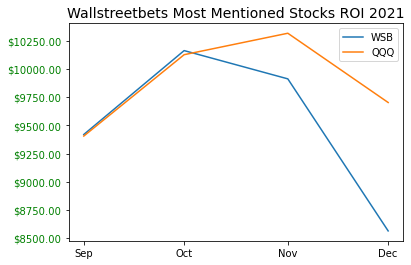

In [199]:
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

ax.plot(monthly_sum['month_year'], monthly_sum['return'], label = "WSB")
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green')
ax.set_title('Wallstreetbets Most Mentioned Stocks ROI 2021',
             fontsize = 14)

# only labels for each month 
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))


# add returns to plot
ax.plot(qqq_df['month_year'], qqq_df['return'], label = 'QQQ')
plt.legend()
plt.show()